In [238]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import os
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
%matplotlib inline

import analyzer
import subject
import visualization
import utils
importlib.reload(analyzer)
importlib.reload(subject)
importlib.reload(visualization)
importlib.reload(utils)

<module 'utils' from '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/utils.py'>

In [239]:
rootPath = os.getcwd()
dataFilePath = os.path.join(rootPath, 'data')
surveyDataFilePath = os.path.join(dataFilePath, 'survey.csv')
loggedDataFilesRootPath = dataFilePath

In [240]:
resultAnalyzer = analyzer.ResultAnalyzer(surveyDataFilePath, loggedDataFilesRootPath)

In [241]:
resultAnalyzer.gradeAnswers(confidenceThreshold=10)

In [242]:
resultAnalyzer.computeIGD(os.path.join(rootPath, 'target_selection.csv'), useShortestDistance=True)

In [243]:
# resultAnalyzer.computeHV(os.path.join(rootPath, 'target_selection.csv'))

In [244]:
s0 = resultAnalyzer.subjects[0]
s1 = resultAnalyzer.subjects[1]
s2 = resultAnalyzer.subjects[2]
s3 = resultAnalyzer.subjects[3]
s4 = resultAnalyzer.subjects[4]
s5 = resultAnalyzer.subjects[5]
s6 = resultAnalyzer.subjects[6]
s7 = resultAnalyzer.subjects[7]
s8 = resultAnalyzer.subjects[8]

In [245]:
# subjects = resultAnalyzer.subjects
# yrs = []
# for s in subjects:
# #     print(s.demographic_data['education'])
#     print(s.prior_experience_data['tradespaceExploration']['years'])
#     yrs.append(s.prior_experience_data['tradespaceExploration']['years'])

In [246]:
# s.demographic_data
# s.prior_experience_data

# Get DataFrame

In [247]:
df = resultAnalyzer.getDataFrame(option="all", excludeHV=True, adjustIGDUsingEntropy=False, adjustIGDUsingEntireNumDesigns=True)

# Rename variable 

In [248]:
namingScheme = {'fcl':'FID',
                'fpwc':'FPWC',
                'dcl':'DID',
                'dpwc':'DPWC',
                'conf_fcl':'confFID',
                'conf_fpwc':'confFPWC',
                'conf_dcl':'confDID',
                'conf_dpwc':'confDPWC',
                'adjustedIGD':'DSYN',
                'normalizedIGD':'nDSYN',
                'normalizedDist2UP':'FSYN',
#                 'normalizedSA':'SA',
#                 'normalizedSAQ1':'SA',
                'normalizedSAExclude1':'SA',
                'normalizedCM':'CM',
                'totalScore':'TestScore',
            }

# df = df.rename(columns=namingScheme, inplace=True)

for oldName in namingScheme:
    if oldName in df.columns:
        newName = namingScheme[oldName]
        df[newName] = df[oldName].values

In [249]:
conditionAlias = {"interactive":"IKE",
                 "automated":"AKE",
                 "manual":"MKE"}

newCol = []
for cond in df["condition"].values:
    newCol.append(conditionAlias[cond])

df["condition"] = newCol

In [250]:
df[["condition","FID","FPWC","DID","DPWC","NScore","PScore"]]

,condition,FID,FPWC,DID,DPWC,NScore,PScore
0,IKE,0.889,0.333,0.778,0.667,0.778,0.444
1,AKE,0.222,0.222,0.667,0.333,0.222,0.222
2,MKE,0.444,0.556,0.444,0.333,0.333,0.667
3,IKE,0.333,0.444,0.667,0.778,0.667,0.111
4,AKE,0.444,0.556,0.667,0.222,0.556,0.444
5,MKE,0.222,0.333,0.444,0.111,0.222,0.333
6,IKE,0.889,0.667,1.000,0.778,0.778,0.778
7,AKE,0.444,0.556,0.778,0.556,0.667,0.333
8,IKE,0.667,0.778,0.778,1.000,0.889,0.556


# Set Visualizer

In [251]:
g1 = [s2, s5]
g2 = [s1, s4, s7]
g3 = [s0, s3, s6, s8]
# g3 = [s6]

In [252]:
visualizer = visualization.Visualizer(groups=[g1,g2,g3], groupNames=['MKE','AKE','IKE'])
visualizer.setDataFrame(df)

# Synthesis task data visualization

In [253]:
df.columns

Index(['id', 'condition', 'type1', 'type2', 'numDesignsToShortestDist', 'DID',
       'numNodes', 'confDPWC', 'FPWC', 'FS_numFeatureViewed', 'HScore',
       'FScore', 'numDesigns', 'normalizedDist2UP', 'FID',
       'DS_numDesignEvaluated', 'meanDist2UP', 'normalizedSAExclude1',
       'normalizedIGD', 'confDID', 'totalScore', 'selfAssessmentExclude1',
       'meanIGD', 'DScore', 'numHighLevelEdges', 'numEdges', 'normalizedSA',
       'LT_numDesignViewed', 'confFID', 'entropy', 'LT_numFilterUsed',
       'adjustedIGD', 'confFPWC', 'FS_numFilterUsed', 'selfAssessment',
       'LT_numFeatureViewed', 'normalizedCM', 'PScore', 'FS_numFeatureTested',
       'normalizedSAQ1', 'DPWC', 'NScore', 'LScore', 'LT_numFeatureFound',
       'DS_numDesignViewed', 'selfAssessmentQ1', 'numHighLevelConcepts',
       'DSYN', 'nDSYN', 'FSYN', 'SA', 'CM', 'TestScore'],
      dtype='object')

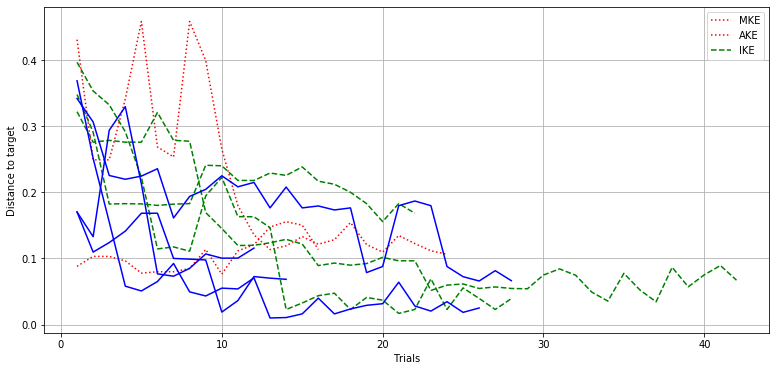

In [258]:
visualizer.designSynthesisLinePlot(linestyles=[':','--','-'], colors=['r','g','b'])
# visualizer.designSynthesisLinePlot(subjects=g1)


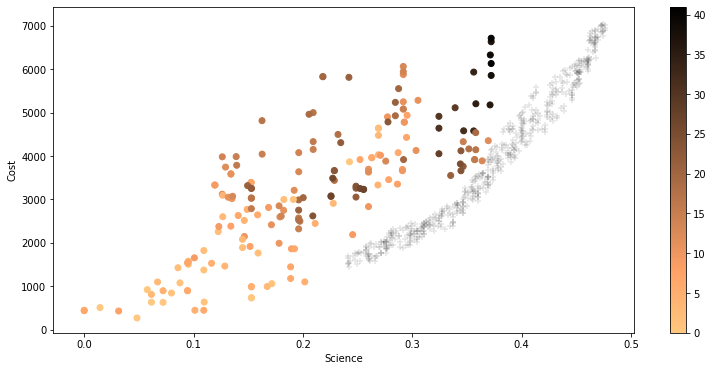

In [224]:
targetDesigns = os.path.join(rootPath, 'target_selection.csv')
visualizer.designSynthesisScatterDF(df, useDesignNum=True, 
                                    targetDesignFilePath=targetDesigns, 
                                    targetDesignAlpha=0.1,
                                    targetDesignMarker='+',
                                    targetDesignColor='black',
                                    cColumn="numDesigns", cmap="copper_r")


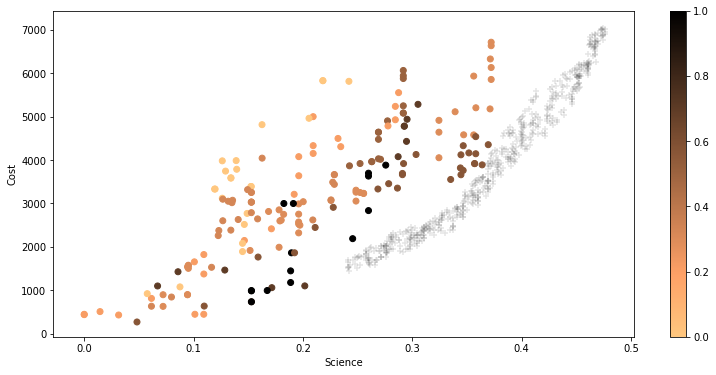

In [225]:
targetDesigns = os.path.join(rootPath, 'target_selection.csv')
visualizer.designSynthesisScatterDF(df, useDesignNum=False, 
                                    targetDesignFilePath=targetDesigns, 
                                    targetDesignAlpha=0.1,
                                    targetDesignMarker='+',
                                    targetDesignColor='black',
                                    cColumn="DSYN", cmap="copper_r")


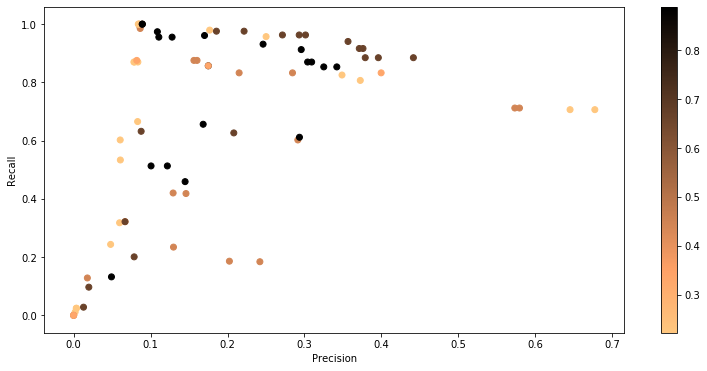

In [187]:
visualizer.featureSynthesisScatterDF(df, cColumn="FID", cmap="copper_r")


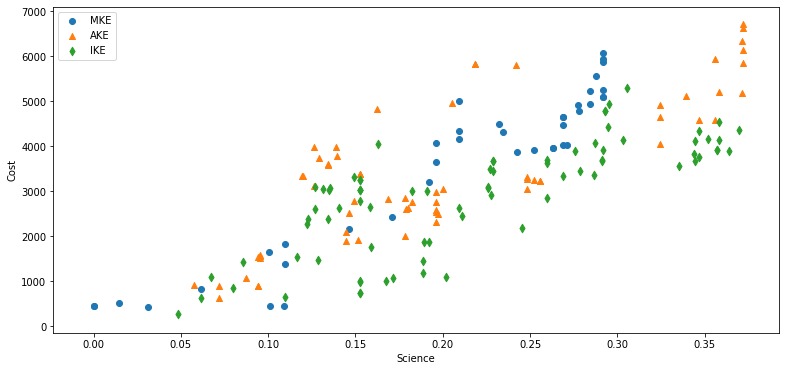

In [34]:
visualizer.designSynthesisScatter(markers=['o','^','d'])


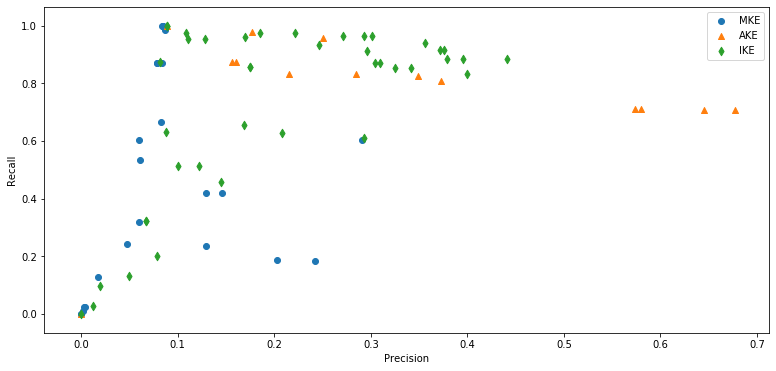

In [35]:
visualizer.featureSynthesisScatter(markers=['o','^','d'])


# Parallel coordinates

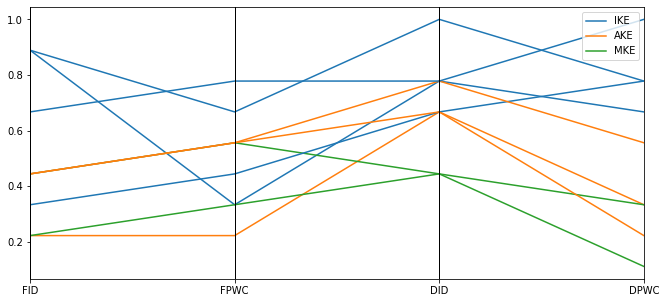

In [36]:
visualizer.parallelCoordinates(columns=['FID','FPWC','DID','DPWC'], 
                                figsize=(11,5))

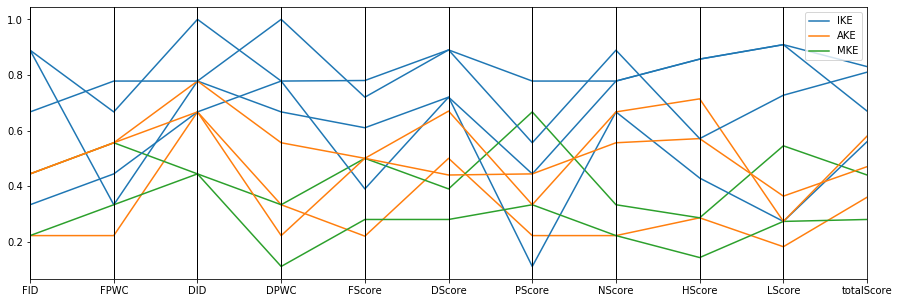

In [37]:
visualizer.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5))

In [38]:
PROP_CYCLE = plt.rcParams['axes.prop_cycle']
COLORS = PROP_CYCLE.by_key()['color']

In [39]:
# tempVis = visualization.Visualizer(groups=[g3], groupNames=['IKE'])
# tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "IKE"]
# tempVis.setDataFrame(tempDF)
# tempVis.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
#                                 figsize=(15,5))


In [40]:
# tempVis = visualization.Visualizer(groups=[g3], groupNames=['AKE'])
# tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "AKE"]
# tempVis.setDataFrame(tempDF)

# tempVis.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
#                                 figsize=(15,5),
#                                 colors=[COLORS[1]])



In [41]:
# tempVis = visualization.Visualizer(groups=[g3], groupNames=['MKE'])
# tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "MKE"]
# tempVis.setDataFrame(tempDF)
# tempVis.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
#                                 figsize=(15,5),
#                             colors=[COLORS[2]])


# Box plots

In [42]:
# visualizer.boxPlot(columns=['FScore','DScore', 'totalScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [43]:
# visualizer.boxPlot(columns=['PScore','NScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [44]:
# visualizer.boxPlot(columns=['HScore','LScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [45]:
# visualizer.boxPlot(columns=['meanDist2UP', 'meanIGD', 'totalScore'], nrows=1, ncols=3, sharey=False, figsize=(14,4.5))

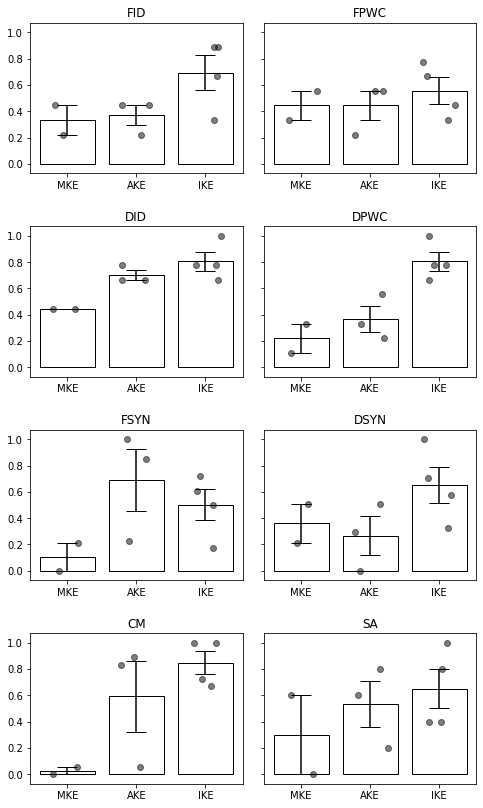

In [46]:
visualizer.barPlot(columns=['FID','FPWC','DID','DPWC','FSYN','DSYN','CM','SA'], 
                   showError=True, 
                   nrows=4, 
                   ncols=2, 
                   sharey=True, 
                   displayPoints=True,
                   subplotsAdjust={"hspace":0.35, "wspace":0.1}, 
                   subplotsHide=None,
                   figsize=(8,14))


In [47]:
die here

SyntaxError: invalid syntax (<ipython-input-47-c985d6ba8f59>, line 1)

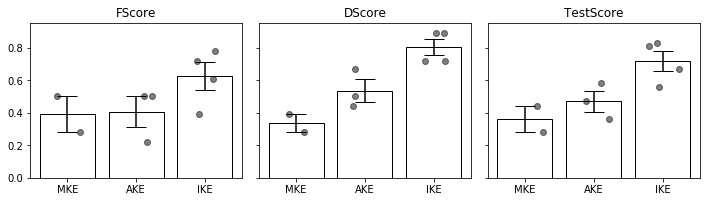

In [48]:
visualizer.barPlot(columns=['FScore','DScore', 'TestScore'], 
                   showError=True, nrows=1, ncols=3, 
                   subplotsAdjust={"wspace":0.08}, 
                   displayPoints=True,
                   sharey=True, figsize=(12,2.85))


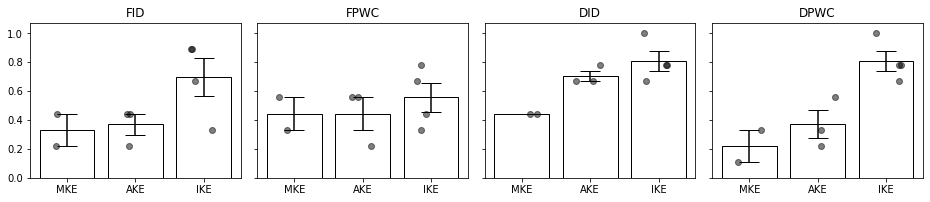

In [49]:
visualizer.barPlot(columns=['FID','FPWC','DID','DPWC'], showError=True, nrows=1, ncols=4, 
                   sharey=True, 
                   subplotsAdjust={"wspace":0.08},
                   displayPoints=True,
                   figsize=(16,2.85))


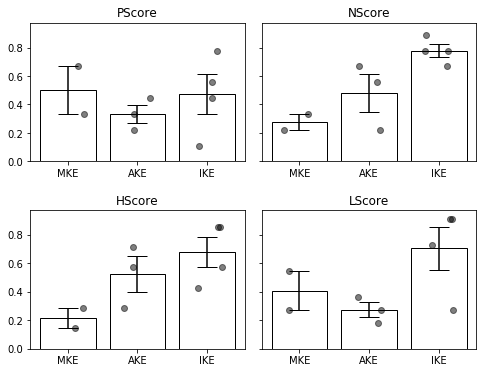

In [50]:
visualizer.barPlot(columns=['PScore','NScore','HScore','LScore'], 
                   showError=True, 
                   nrows=2, ncols=2, sharey=True, 
                   subplotsAdjust={"hspace":0.35, "wspace":0.08}, 
                   displayPoints=True,
                   figsize=(8,6))

In [51]:
# visualizer.barPlot(columns=['PScore','NScore', 'FScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))

In [52]:
# visualizer.barPlot(columns=['HScore','LScore', 'FScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))

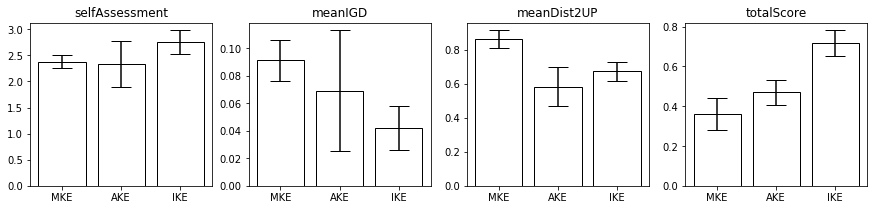

In [53]:
visualizer.barPlot(dataFrame=df, columns=['selfAssessment', 'meanIGD', 'meanDist2UP', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))
# visualizer.barPlot(dataFrame=df, columns=['selfAssessmentExclude1', 'meanIGD', 'meanDist2UP', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


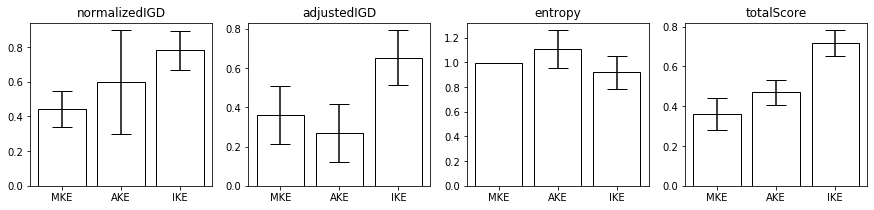

In [54]:
visualizer.barPlot(dataFrame=df, columns=['normalizedIGD', 'adjustedIGD', 'entropy', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


In [55]:
# visualizer.barPlot(dataFrame=df, columns=['HV', 'adjustedHV', 'selfAssessment', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


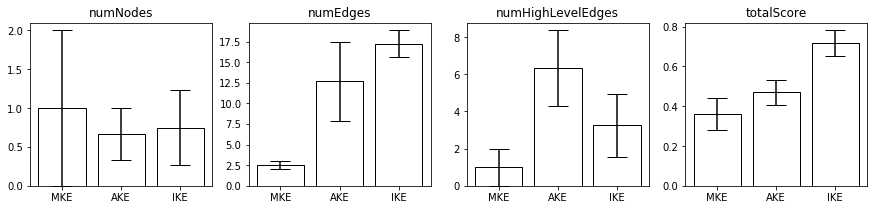

In [56]:
visualizer.barPlot(dataFrame=df, columns=["numNodes","numEdges","numHighLevelEdges","totalScore"], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


# Box plots - Logged Data

In [ ]:
# df_lt = resultAnalyzer.getDataFrame(option="learningTask",columns=['totalScore'])
# visualizer.boxPlot(columns=['LT_numDesignViewed','LT_numFeatureViewed','totalScore'], dataFrame=df_lt, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


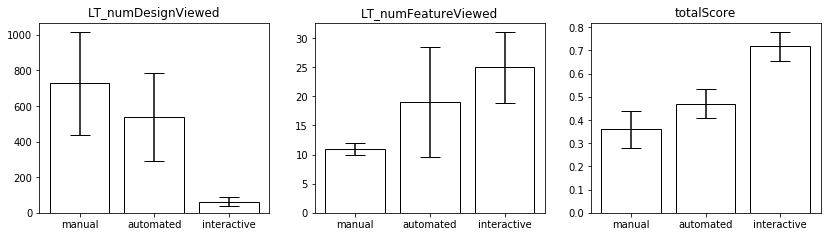

In [57]:
df_lt = resultAnalyzer.getDataFrame(option="learningTask", columns=["totalScore"])
visualizer.barPlot(columns=['LT_numDesignViewed','LT_numFeatureViewed','totalScore'], dataFrame=df_lt, showError=True, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


In [58]:
# df_fs = resultAnalyzer.getDataFrame(option="featureSynthesis")
# visualizer.boxPlot(columns=['meanDist2UP','FS_numFeatureViewed', 'FS_numFilterUsed','FS_numFeatureTested'], dataFrame=df_fs, nrows=1, ncols=4, sharey=False, figsize=(16,4))



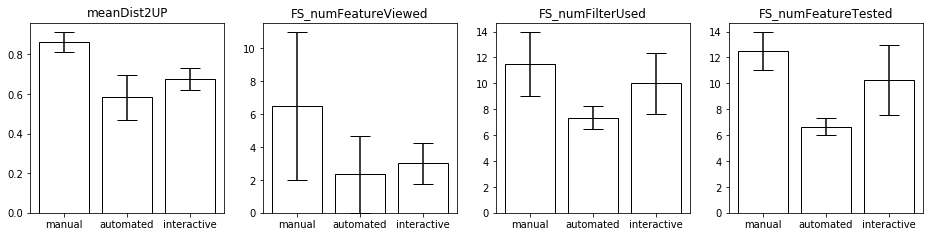

In [59]:
df_fs = resultAnalyzer.getDataFrame(option="featureSynthesis", invertSIB=False)
visualizer.barPlot(columns=['meanDist2UP','FS_numFeatureViewed', 'FS_numFilterUsed','FS_numFeatureTested'], dataFrame=df_fs, showError=True, nrows=1, ncols=4, sharey=False, figsize=(16,3.5))


In [60]:
# df_ds = resultAnalyzer.getDataFrame(option="designSynthesis")
# visualizer.boxPlot(columns=['meanIGD','numDesigns', 'DS_numDesignViewed'], dataFrame=df_ds, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))



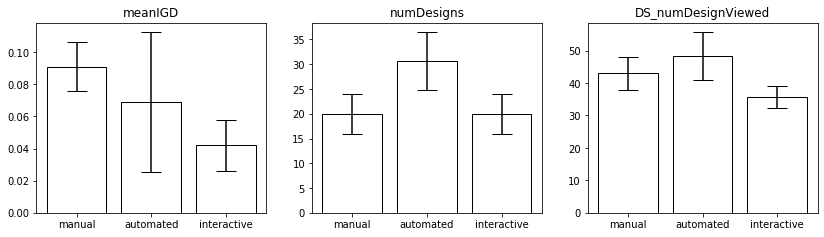

In [61]:
df_ds = resultAnalyzer.getDataFrame(option="designSynthesis", invertSIB=False)
visualizer.barPlot(columns=['meanIGD','numDesigns', 'DS_numDesignViewed'], dataFrame=df_ds, showError=True, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


# Statistical tests

In [62]:
dfi = df.loc[df['condition'] == "IKE"]
dfa = df.loc[df['condition'] == "AKE"]
dfm = df.loc[df['condition'] == "MKE"]

In [63]:
conditions = ["MKE", "AKE", "IKE"]
measures = ["FID","FPWC","DID","DPWC","FSYN","DSYN","CM","SA"]

out = []
for mea in measures:
    line = [mea]
    for cond in conditions:
        dat = None
        if cond == "MKE":
            dat = dfm
        elif cond == "AKE":
            dat = dfa
        elif cond == "IKE":
            dat = dfi
        
        mean = round(np.mean(dat[mea]),2)
        stdev = round(np.std(dat[mea]),2)
        temp = "{0} ({1})".format(mean, stdev)
        line.append(temp)
    
    out.append(" & ".join(line))

print(" \\\\\n".join(out))
print()

for mea in measures:
    t1, p1 = stats.ttest_ind(dfi[mea], dfa[mea])
    t2, p2 = stats.ttest_ind(dfi[mea], dfm[mea])
    t3, p3 = stats.ttest_ind(dfa[mea], dfm[mea])
#     t1, p1 = stats.ranksums(dfi[mea], dfa[mea])
#     t2, p2 = stats.ranksums(dfi[mea], dfm[mea])
#     t3, p3 = stats.ranksums(dfa[mea], dfm[mea])
    p1 = p1/2
    p2 = p2/2
    p3 = p3/2
    if p1  < 0.05:
        print("{0} IKE-AKE | t: {1} | p-val: {2}".format(mea, t1, p1))
    if p2  < 0.05:
        print("{0} IKE-MKE | t: {1} | p-val: {2}".format(mea, t2, p2))
    if p3  < 0.05:
        print("{0} AKE-MKE | t: {1} | p-val: {2}".format(mea, t3, p3))

FID & 0.33 (0.11) & 0.37 (0.1) & 0.69 (0.23) \\
FPWC & 0.44 (0.11) & 0.44 (0.16) & 0.56 (0.18) \\
DID & 0.44 (0.0) & 0.7 (0.05) & 0.81 (0.12) \\
DPWC & 0.22 (0.11) & 0.37 (0.14) & 0.81 (0.12) \\
FSYN & 0.11 (0.11) & 0.69 (0.33) & 0.5 (0.2) \\
DSYN & 0.36 (0.15) & 0.27 (0.21) & 0.65 (0.24) \\
CM & 0.03 (0.03) & 0.59 (0.38) & 0.85 (0.15) \\
SA & 0.3 (0.3) & 0.53 (0.25) & 0.65 (0.26)

DID IKE-MKE | t: 3.4533303075191335 | p-val: 0.012987675802762791
DID AKE-MKE | t: 5.443111729805021 | p-val: 0.006088265622417749
DPWC IKE-AKE | t: 3.7365211554631754 | p-val: 0.0067399335013305405
DPWC IKE-MKE | t: 4.674674674674675 | p-val: 0.004742616285971336
CM IKE-MKE | t: 6.0933073304225935 | p-val: 0.0018343873595420255


In [64]:
conditions = ["MKE", "AKE", "IKE"]
measures = ["FScore","DScore","TestScore"]

out = []
for mea in measures:
    line = [mea]
    for cond in conditions:
        dat = None
        if cond == "MKE":
            dat = dfm
        elif cond == "AKE":
            dat = dfa
        elif cond == "IKE":
            dat = dfi
        
        mean = round(np.mean(dat[mea]),2)
        stdev = round(np.std(dat[mea]),2)
        temp = "{0} ({1})".format(mean, stdev)
        line.append(temp)
    
    out.append(" & ".join(line))

print(" \\\\\n".join(out))
print()

for mea in measures:
    t1, p1 = stats.ttest_ind(dfi[mea], dfa[mea])
    t2, p2 = stats.ttest_ind(dfi[mea], dfm[mea])
    t3, p3 = stats.ttest_ind(dfa[mea], dfm[mea])
    p1 = p1/2
    p2 = p2/2
    p3 = p3/2
    if p1  < 0.05:
        print("{0} IKE-AKE | t: {1} | p-val: {2}".format(mea, t1, p1))
    if p2  < 0.05:
        print("{0} IKE-MKE | t: {1} | p-val: {2}".format(mea, t2, p2))
    if p3  < 0.05:
        print("{0} AKE-MKE | t: {1} | p-val: {2}".format(mea, t3, p3))

FScore & 0.39 (0.11) & 0.41 (0.13) & 0.62 (0.15) \\
DScore & 0.34 (0.05) & 0.54 (0.1) & 0.81 (0.09) \\
TestScore & 0.36 (0.08) & 0.47 (0.09) & 0.72 (0.11)

DScore IKE-AKE | t: 3.2799817178952244 | p-val: 0.010977484832473381
DScore IKE-MKE | t: 5.805954551138062 | p-val: 0.0021891282504923814
TestScore IKE-AKE | t: 2.691582502948203 | p-val: 0.02160839474350029
TestScore IKE-MKE | t: 3.340747655388624 | p-val: 0.014407857117368776


In [65]:
conditions = ["MKE", "AKE", "IKE"]
measures = ["PScore","NScore","HScore","LScore"]

out = []
for mea in measures:
    line = [mea]
    for cond in conditions:
        dat = None
        if cond == "MKE":
            dat = dfm
        elif cond == "AKE":
            dat = dfa
        elif cond == "IKE":
            dat = dfi
        
        mean = round(np.mean(dat[mea]),2)
        stdev = round(np.std(dat[mea]),2)
        temp = "{0} ({1})".format(mean, stdev)
        line.append(temp)
    
    out.append(" & ".join(line))

print(" \\\\\n".join(out))
print()

for mea in measures:
    t1, p1 = stats.ttest_ind(dfi[mea], dfa[mea])
    t2, p2 = stats.ttest_ind(dfi[mea], dfm[mea])
    t3, p3 = stats.ttest_ind(dfa[mea], dfm[mea])
    p1 = p1/2
    p2 = p2/2
    p3 = p3/2
    if p1  < 0.05:
        print("{0} IKE-AKE | t: {1} | p-val: {2}".format(mea, t1, p1))
    if p2  < 0.05:
        print("{0} IKE-MKE | t: {1} | p-val: {2}".format(mea, t2, p2))
    if p3  < 0.05:
        print("{0} AKE-MKE | t: {1} | p-val: {2}".format(mea, t3, p3))

PScore & 0.5 (0.17) & 0.33 (0.09) & 0.47 (0.24) \\
NScore & 0.28 (0.06) & 0.48 (0.19) & 0.78 (0.08) \\
HScore & 0.21 (0.07) & 0.52 (0.18) & 0.68 (0.19) \\
LScore & 0.41 (0.14) & 0.27 (0.07) & 0.7 (0.26)

NScore IKE-AKE | t: 2.388440808189469 | p-val: 0.03125410476751582
NScore IKE-MKE | t: 6.5858291899419985 | p-val: 0.0013762883603312252
HScore IKE-MKE | t: 2.787696671799997 | p-val: 0.024714086231393942
LScore IKE-AKE | t: 2.3585298343068324 | p-val: 0.03243465252629614


In [ ]:
measures = ["FID","FPWC","DID","DPWC","FSYN","DSYN","SA"] + ["FScore","DScore","TestScore"] + ["PScore","NScore","HScore","LScore"]

for mea in measures:
    f,p = stats.f_oneway(dfi[mea], dfa[mea], dfm[mea])
    if p < 0.05:
        print("{0} | p-val: {1}".format(mea, p))

In [ ]:
# from sklearn.linear_model import LinearRegression

# # X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

# X = df[['condition','NScore']].values
# y = df['totalScore'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, y)  # perform linear regression


In [ ]:
# linear_regressor.score(X, y)

In [ ]:
# linear_regressor.coef_

In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# data = sm.datasets.get_rdataset("dietox", "geepack").data
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit()
# print(mdf.summary())

# Survey results

In [ ]:
visualizer.featurePrefPlot(figsize=(10,18))

1
- Two radars should not be assigned to the same orbit
- Instruments {AERO_POL, CPR_RAD, SAR_ALTIM} are not assigned to the same orbit

2.
- Instruments that measure ocean color are not assigned to AM orbit
- AERO_LID, CPR_RAD are not assigned to SSO-600-DD orbit

3.
- Atmospheric chemistry instruments are assigned together in the same orbit
- HIRES_SOUND and HYP_IMAG are assigned together in the same orbit

4.
- SSO-800-DD is empty, except when it contains VEG_LID and/or SAR_ALTIM
- {OCE_SPEC, AERO_POL, AERO_LID, HYP_ERB, CPR_RAD, VEG_INSAR, CHEM_UVSPEC,CHEM_SWIRSPEC, HYP_IMAG, HIRES_SOUND} are not assigned to SSO-800-DD

5.
- VEG_INSAR is not used, except when it is assigned to LEO-600-polar
- HYP_ERB is not assigned to any of the orbits in the set {LEO-600-polar, SSO-600-AM, SSO-600-DD, SSO-800-DD}

6.
- Radars and lidars are not assigned to the same orbit, except when VEG_LID and VEG_INSAR are assigned together
- AERO_LID and CPR_RAD is not assigned together in the same orbit, and SAR_ALTIM and AERO_LID are not assigned together in the same orbit

7.
- AERO_POL and SAR_ALTIM are NOT assigned together in the same orbit
- CHEM_UVSPEC and HIRES_SOUND are assigned together in at least one of the orbits

8.
- OCE_SPEC is assigned to LEO-600-polar
- VEG_INSAR is NOT assigned to SSO-600-AM

9.
- AERO_LID is NOT used
- SAR_ALTIM is used

In [ ]:
visualizer.selfAssessmentPlot(displayStderr=True)

1. I learned a lot about the given design problem from this exercise
2. The features I learned from this exercise will be useful to solve a different (but similar)
design problem in the future
3. The tool was useful in checking hypotheses I had based on my prior knowledge
4. The tool was useful in checking new hypotheses I had as I analyzed the data.

0=strongly disagree, 1=disagree, 2=undecided, 3=agree, 4=strongly agree

# Get transcript comments

In [ ]:
subjects_manual = resultAnalyzer.filterSubjects(condition=4)
subjects_auto = resultAnalyzer.filterSubjects(condition=5)
subjects_interactive = resultAnalyzer.filterSubjects(condition=6)

In [ ]:
comments = resultAnalyzer.getComments(resultAnalyzer.subjects, "problem_solving_task", "F_cl_3", displayCondition=True, displayParticipantID=False, displayKeyword=False)

for line in comments:
    print(line)
    print("")
    

In [ ]:
resultAnalyzer.getComments(subjects_manual, "problem_solving_task", "F", displayParticipantID=False, displayKeyword=True)


In [ ]:
resultAnalyzer.getComments(subjects_auto, "problem_solving_task", "F_cl", displayParticipantID=False, displayKeyword=True)


In [ ]:
comments = resultAnalyzer.getComments(resultAnalyzer.subjects, "survey", "gen", displayCondition=True, displayParticipantID=False, displayKeyword=True)

for line in comments:
    print(line + "\n")

## Correlation 

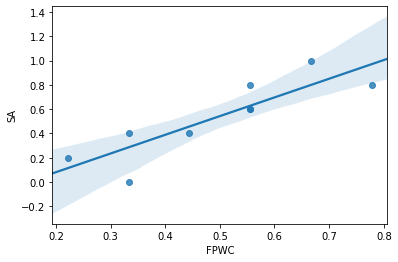

In [66]:
sns.regplot(x="FPWC", y="SA", data=df, ci=95)

In [67]:
mod = sm.OLS(np.array(df['SA']), np.array(df['totalScore']))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              65.45
Date:                Mon, 25 Nov 2019   Prob (F-statistic):                    4.03e-05
Time:                        09:59:02   Log-Likelihood:                          1.6405
No. Observations:                   9   AIC:                                     -1.281
Df Residuals:                       8   BIC:                                     -1.084
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/bang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


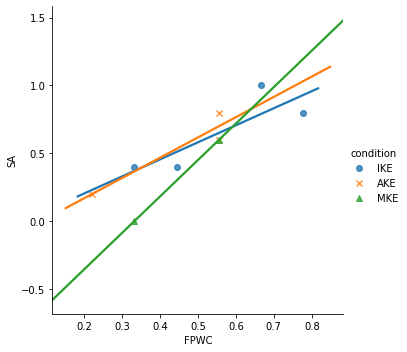

In [68]:
sns.lmplot(x="FPWC", y="SA", hue="condition", markers=["o","x","^"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="totalScore", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [69]:
# sns.lmplot(x="selfAssessment", y="totalScore", hue="type1", markers=["o","x"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="totalScore", hue="type", markers=["o","x"], data=df, ci=None);

## Correlation - Design synthesis task

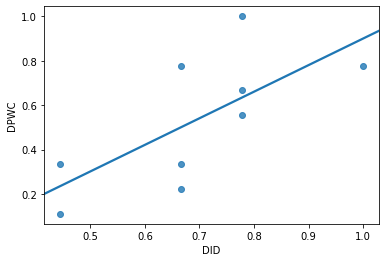

In [70]:
sns.regplot(x="DID", y="DPWC", data=df, ci=None);

In [71]:
xmod = sm.OLS(np.array(df['selfAssessment']), np.array(df['meanIGD']))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              65.45
Date:                Mon, 25 Nov 2019   Prob (F-statistic):                    4.03e-05
Time:                        09:59:10   Log-Likelihood:                          1.6405
No. Observations:                   9   AIC:                                     -1.281
Df Residuals:                       8   BIC:                                     -1.084
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

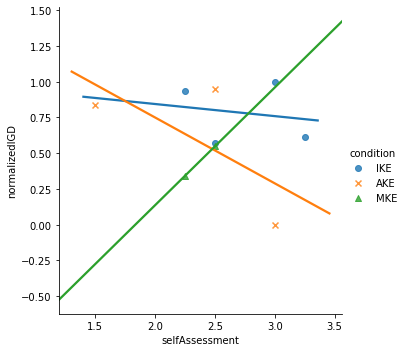

In [72]:
sns.lmplot(x="selfAssessment", y="normalizedIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="normalizedIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
# sns.lmplot(x="selfAssessment", y="normalizedIGD", hue="type1", markers=["o","x"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="normalizedIGD", hue="type", markers=["o","x"], data=df, ci=None);

In [ ]:
sns.lmplot(x="totalScore", y="meanIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);


In [ ]:
sns.regplot(x="selfAssessment", y="numDesigns", data=df, ci=None);

In [ ]:
sns.regplot(x="numDesigns", y="totalScore", data=df, ci=None);

In [ ]:
sns.regplot(x="numDesigns", y="normalizedIGD", data=df, ci=None);

In [ ]:
sns.regplot(x="numDesigns", y="selfAssessment", data=df, ci=None);

In [ ]:
sns.regplot(x="selfAssessment", y="adjustedIGD", data=df);

In [ ]:
sns.regplot(x="DScore", y="adjustedIGD", data=df);

In [ ]:
sns.regplot(x="DPWC", y="adjustedIGD", data=df);

## Correlation - feature synthesis task

In [ ]:
sns.regplot(x="selfAssessment", y="meanDist2UP", data=df);

In [ ]:
# sns.regplot(x="selfAssessmentExclude1", y="meanDist2UP", data=df);

In [ ]:
sns.lmplot(x="selfAssessment", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
# sns.lmplot(x="selfAssessment", y="meanDist2UP", hue="type", markers=["o","x"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="meanDist2UP", hue="type", markers=["o","x"], data=df, ci=None);

In [ ]:
sns.lmplot(x="totalScore", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
mod = sm.OLS(np.array(df['selfAssessment']), np.array(df['meanDist2UP']))
res = mod.fit()
print(res.summary())

# Correlation - concept mapping

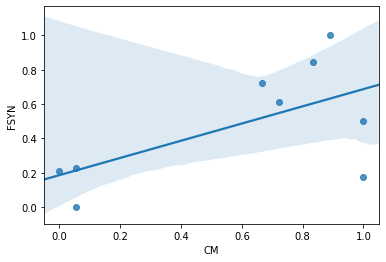

In [73]:
sns.regplot(x="CM", y="FSYN", data=df);

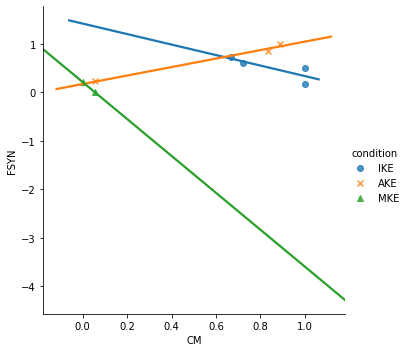

In [74]:
sns.lmplot(x="CM", y="FSYN", hue="condition", markers=["o","x","^"], data=df, ci=None);

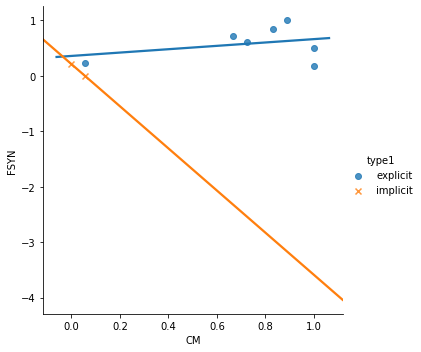

In [75]:
sns.lmplot(x="CM", y="FSYN", hue="type1", markers=["o","x"], data=df, ci=None);

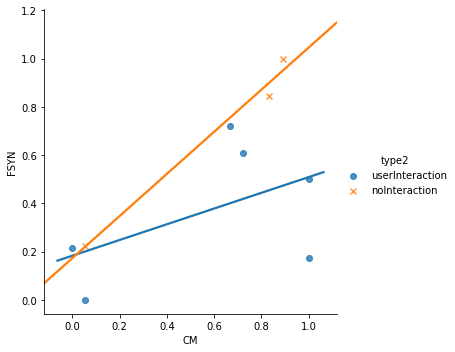

In [76]:
sns.lmplot(x="CM", y="FSYN", hue="type2", markers=["o","x"], data=df, ci=None);

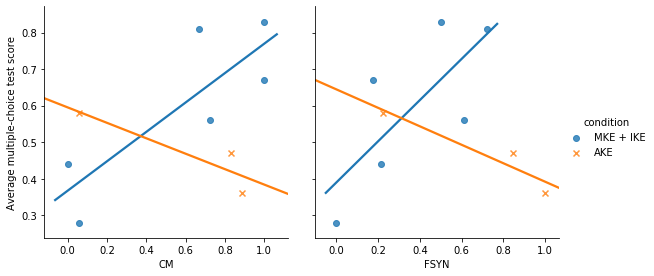

In [77]:
dftemp = df.copy()
newcol = []
for typ in dftemp["type2"].values:
    if typ == "userInteraction":
        newcol.append("MKE + IKE")
    else:
        newcol.append("AKE")
dftemp["condition"] = newcol
dftemp["Average multiple-choice test score"] = dftemp["totalScore"]

sns.pairplot(dftemp, x_vars=["CM", "FSYN"], y_vars=["Average multiple-choice test score"], hue="condition", markers=["o","x"], height=4, aspect=1., kind="reg", 
             plot_kws={"ci":None},
            grid_kws={},)

In [78]:
# g = sns.lmplot(x="FSYN", y="totalScore", hue="type2", markers=["o","x"], data=df, ci=None);
# g._legend.remove()
# plt.legend(title='Smoker', loc='center right', labels=['Hell Yeh', 'Nah Bruh'])
# plt.show(g)

In [79]:
# sns.lmplot(x="CM", y="totalScore", hue="type2", markers=["o","x"], data=df, ci=None);


In [125]:
# mod = smf.ols(formula='totalScore ~ numEdges * C(type2)', data=df)
# res = mod.fit()
# print(res.summary())

In [ ]:
die here

# Etc

In [ ]:
df.columns

In [ ]:
sns.pairplot(df[['condition','FScore','DScore','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','PScore','NScore','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','FScore','normalizedDist2UP','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','DScore','adjustedIGD','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','numDesigns','selfAssessment','normalizedIGD']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','adjustedIGD','entropy','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','confFID','FID','selfAssessment']], kind="reg")

In [ ]:
die here

# Figures for learning measure comparison

In [80]:
dfm = df[['condition','FID','FPWC','FSYN','DID','DPWC','DSYN','CM','SA']].copy()

In [81]:
# dfm = dfm.drop(index=1)

In [82]:
df[["id","condition","FSYN","DSYN"]]

,id,condition,FSYN,DSYN
0,5401038285006004819-9_15_19_13,IKE,0.175,0.706
1,3700789476005004819-9_16_15_58,AKE,1.000,0.297
2,3664515135004004819-9_20_14_13,MKE,0.213,0.511
3,3221520754006004819-10_2_6_8,IKE,0.610,1.000
4,5577734270005004819-10_4_13_54,AKE,0.846,0.000
5,1708104476004004819-10_8_16_14,MKE,0.000,0.213
6,5772081801006004819-10_10_13_3,IKE,0.503,0.328
7,4612444713005004819-10_30_14_8,AKE,0.225,0.507
8,0663999114006004819-11_8_9_7,IKE,0.720,0.574


In [83]:
dfconf = df[['condition','FID','confFID','FPWC','confFPWC','FSYN','DID','confDID','DPWC','confDPWC','DSYN','SA']].copy()


In [84]:
rPearson, pPearson, ciLoPearson, ciHiPearson = utils.calculate_pearsonr(dfm, decimal=3)

In [85]:
rSpearman, pSpearman, ciLoSpearman, ciHiSpearman = utils.calculate_spearmanr(dfm, decimal=3)

In [86]:
rPearson

,FID,FPWC,FSYN,DID,DPWC,DSYN,CM,SA
FID,1,0.471,-0.134,0.727,0.632,0.18,0.493,0.642
FPWC,0.471,1,0.084,0.407,0.553,0.011,-0.05,0.862
FSYN,-0.134,0.084,1,0.292,0.172,-0.175,0.617,0.281
DID,0.727,0.407,0.292,1,0.699,0.11,0.654,0.64
DPWC,0.632,0.553,0.172,0.699,1,0.654,0.416,0.511
DSYN,0.18,0.011,-0.175,0.11,0.654,1,0.043,-0.089
CM,0.493,-0.05,0.617,0.654,0.416,0.043,1,0.295
SA,0.642,0.862,0.281,0.64,0.511,-0.089,0.295,1


In [87]:
tempdf = rPearson
for rowname, row in tempdf.iterrows():
    out = [rowname]
    i = np.where(tempdf.columns.values == rowname)[0][0]
    for j, col in enumerate(row):
        if i == j:
            out.append("-")
        elif j > i:
            out.append("")
        else:    
            out.append(str(col))
    out = " & ".join(out) + " \\\\"
    print(out)

FID & - &  &  &  &  &  &  &  \\
FPWC & 0.471 & - &  &  &  &  &  &  \\
FSYN & -0.134 & 0.084 & - &  &  &  &  &  \\
DID & 0.727 & 0.407 & 0.292 & - &  &  &  &  \\
DPWC & 0.632 & 0.553 & 0.172 & 0.699 & - &  &  &  \\
DSYN & 0.18 & 0.011 & -0.175 & 0.11 & 0.654 & - &  &  \\
CM & 0.493 & -0.05 & 0.617 & 0.654 & 0.416 & 0.043 & - &  \\
SA & 0.642 & 0.862 & 0.281 & 0.64 & 0.511 & -0.089 & 0.295 & - \\


In [88]:
pPearson / 2

,FID,FPWC,FSYN,DID,DPWC,DSYN,CM,SA
FID,0,0.1,0.366,0.0135,0.034,0.322,0.089,0.031
FPWC,0.1,0,0.4145,0.1385,0.0615,0.4885,0.4495,0.0015
FSYN,0.366,0.4145,0,0.2225,0.3285,0.326,0.0385,0.232
DID,0.0135,0.1385,0.2225,0,0.018,0.3885,0.028,0.0315
DPWC,0.034,0.0615,0.3285,0.018,0,0.028,0.1325,0.08
DSYN,0.322,0.4885,0.326,0.3885,0.028,0,0.456,0.41
CM,0.089,0.4495,0.0385,0.028,0.1325,0.456,0,0.221
SA,0.031,0.0015,0.232,0.0315,0.08,0.41,0.221,0


In [89]:
ciLoPearson

,FID,FPWC,FSYN,DID,DPWC,DSYN,CM,SA
FID,0,0.451,-0.159,0.714,0.616,0.155,0.473,0.627
FPWC,0.451,0,0.059,0.386,0.535,-0.015,-0.075,0.855
FSYN,-0.159,0.059,0,0.269,0.147,-0.2,0.601,0.257
DID,0.714,0.386,0.269,0,0.686,0.085,0.639,0.625
DPWC,0.616,0.535,0.147,0.686,0,0.639,0.395,0.492
DSYN,0.155,-0.015,-0.2,0.085,0.639,0,0.018,-0.114
CM,0.473,-0.075,0.601,0.639,0.395,0.018,0,0.271
SA,0.627,0.855,0.257,0.625,0.492,-0.114,0.271,0


In [90]:
ciHiPearson

,FID,FPWC,FSYN,DID,DPWC,DSYN,CM,SA
FID,0,0.491,-0.108,0.738,0.647,0.204,0.512,0.657
FPWC,0.491,0,0.11,0.428,0.57,0.037,-0.024,0.869
FSYN,-0.108,0.11,0,0.316,0.197,-0.15,0.633,0.304
DID,0.738,0.428,0.316,0,0.712,0.136,0.668,0.655
DPWC,0.647,0.57,0.197,0.712,0,0.668,0.437,0.529
DSYN,0.204,0.037,-0.15,0.136,0.668,0,0.069,-0.064
CM,0.512,-0.024,0.633,0.668,0.437,0.069,0,0.318
SA,0.657,0.869,0.304,0.655,0.529,-0.064,0.318,0


In [91]:
rSpearman

,FID,FPWC,FSYN,DID,DPWC,DSYN,CM,SA
FID,1,0.603,-0.145,0.76,0.595,0.351,0.418,0.714
FPWC,0.603,1,0.145,0.465,0.515,0.102,-0.163,0.91
FSYN,-0.145,0.145,1,0.156,0.193,-0.183,0.319,0.304
DID,0.76,0.465,0.156,1,0.721,0.26,0.59,0.584
DPWC,0.595,0.515,0.193,0.721,1,0.74,0.309,0.46
DSYN,0.351,0.102,-0.183,0.26,0.74,1,0.008,-0.017
CM,0.418,-0.163,0.319,0.59,0.309,0.008,1,0.162
SA,0.714,0.91,0.304,0.584,0.46,-0.017,0.162,1


In [92]:
pSpearman / 2

,FID,FPWC,FSYN,DID,DPWC,DSYN,CM,SA
FID,0,0.043,0.3545,0.0085,0.0455,0.1775,0.1315,0.0155
FPWC,0.043,0,0.355,0.104,0.078,0.397,0.3375,0.0005
FSYN,0.3545,0.355,0,0.3445,0.309,0.3185,0.201,0.2135
DID,0.0085,0.104,0.3445,0,0.014,0.2495,0.0475,0.0495
DPWC,0.0455,0.078,0.309,0.014,0,0.0115,0.209,0.1065
DSYN,0.1775,0.397,0.3185,0.2495,0.0115,0,0.4915,0.483
CM,0.1315,0.3375,0.201,0.0475,0.209,0.4915,0,0.339
SA,0.0155,0.0005,0.2135,0.0495,0.1065,0.483,0.339,0


In [93]:
ciLoSpearman

,FID,FPWC,FSYN,DID,DPWC,DSYN,CM,SA
FID,0,-0.103,-0.738,0.194,-0.114,-0.409,-0.341,0.096
FPWC,-0.103,0,-0.575,-0.288,-0.227,-0.603,-0.746,0.62
FSYN,-0.738,-0.575,0,-0.567,-0.54,-0.755,-0.438,-0.451
DID,0.194,-0.288,-0.567,0,0.109,-0.489,-0.122,-0.132
DPWC,-0.114,-0.227,-0.54,0.109,0,0.148,-0.447,-0.294
DSYN,-0.409,-0.603,-0.755,-0.489,0.148,0,-0.659,-0.673
CM,-0.341,-0.746,-0.438,-0.122,-0.447,-0.659,0,-0.563
SA,0.096,0.62,-0.451,-0.132,-0.294,-0.673,-0.563,0


In [94]:
ciHiSpearman

,FID,FPWC,FSYN,DID,DPWC,DSYN,CM,SA
FID,0,0.905,0.574,0.946,0.902,0.823,0.847,0.935
FPWC,0.905,0,0.738,0.863,0.879,0.718,0.562,0.981
FSYN,0.574,0.738,0,0.743,0.76,0.547,0.811,0.805
DID,0.946,0.863,0.743,0,0.937,0.788,0.901,0.899
DPWC,0.902,0.879,0.76,0.937,0,0.941,0.808,0.861
DSYN,0.823,0.718,0.547,0.788,0.941,0,0.669,0.655
CM,0.847,0.562,0.811,0.901,0.808,0.669,0,0.746
SA,0.935,0.981,0.805,0.899,0.861,0.655,0.746,0


In [48]:
# from scipy.stats import pearsonr, spearmanr

# print(pearsonr(dfconf["FID"],dfconf["confFID"]))
# print(pearsonr(dfconf["FPWC"],dfconf["confFPWC"]))
# print(pearsonr(dfconf["DID"],dfconf["confDID"]))
# print(pearsonr(dfconf["DPWC"],dfconf["confDPWC"]))
# print()

# print(spearmanr(dfconf["FID"],dfconf["confFID"]))
# print(spearmanr(dfconf["FPWC"],dfconf["confFPWC"]))
# print(spearmanr(dfconf["DID"],dfconf["confDID"]))
# print(spearmanr(dfconf["DPWC"],dfconf["confDPWC"]))

In [49]:
# x="CM"
# y="SA"
# sns.regplot(x=x, y=y, data=df, ci=95)
# sns.lmplot(x=x, y=y, hue="condition", markers=["o","x","^"], data=df, ci=None)
# sns.lmplot(x=x, y=y, hue="type1", markers=["o","x"], data=df, ci=None)
# sns.lmplot(x=x, y=y, hue="type2", markers=["o","x"], data=df, ci=None)
# sns.lmplot(x=x, y="totalScore", hue="type2", markers=["o","x"], data=df, ci=None)


In [ ]:
# corr = dfm.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 13))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .6})

In [ ]:
# tempvis = visualization.Visualizer()
# try:
#     dfm["index"]
# except:
#     dfm["index"] = [i for i in range(len(dfm["condition"].values))]
# tempvis.parallelCoordinates(columns=['FID','FPWC','FSYN','DID','DPWC','DSYN','CM','SA'], 
#                                 colors=None,
#                                 dataFrame=dfm,
#                                 grid=True,
#                                 figsize=(14,4), 
#                                 groupBy="index",
#                                 removeLegend=True,
#                                alpha=0.9)

In [ ]:
# tempvis = visualization.Visualizer()
# tempvis.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','SA'], dataFrame=dfm,
#                                 colors=["black"]*3,
#                                 grid=True,
#                                 figsize=(12,4), 
#                                 groupBy=None,
#                                alpha=0.5)

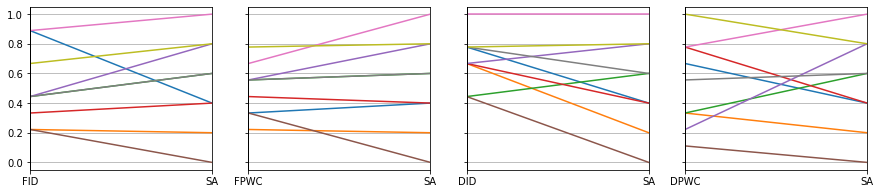

In [95]:
tempvis = visualization.Visualizer()
try:
    dfm["index"]
except:
    dfm["index"] = [i for i in range(len(dfm["condition"].values))]
    
tempvis.parallelCoordinateVariablePairs(varPairList=[
                                            ['FID','SA'],
                                            ['FPWC','SA'],
                                            ['DID','SA'],
                                            ['DPWC','SA'],
                                        ],
                                        colors=None,
                                        grid=True,
                                        groupBy="index",
                                        dataFrame=dfm,
                                        removeLegend=True,
                                        nrows=1, ncols=4, sharey=True, figsize=(15,3))


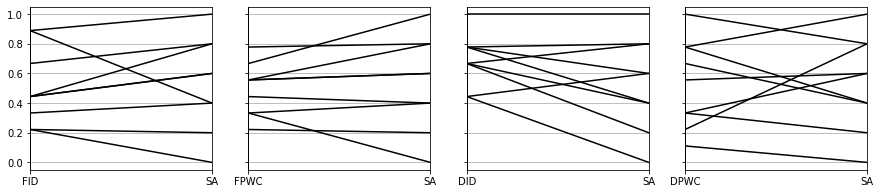

In [96]:
tempvis = visualization.Visualizer()
try:
    dfm["index"]
except:
    dfm["index"] = [i for i in range(len(dfm["condition"].values))]
tempvis.parallelCoordinateVariablePairs(varPairList=[
                                            ['FID','SA'],
                                            ['FPWC','SA'],
                                            ['DID','SA'],
                                            ['DPWC','SA'],
                                        ],
                                        colors=["black"]*3,
                                        grid=True,
                                        groupBy="index",
                                        dataFrame=dfm,
                                        removeLegend=True,
                                        nrows=1, ncols=4, sharey=True, figsize=(15,3))


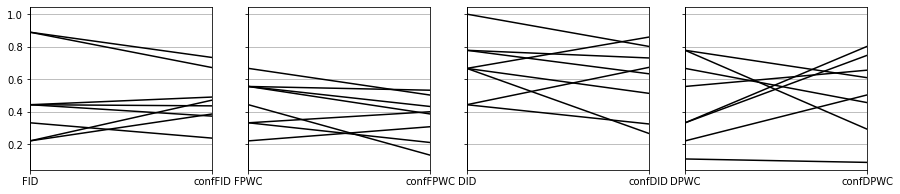

In [52]:
tempvis = visualization.Visualizer()
tempDF = dfconf
try:
    tempDF["index"]
except:
    tempDF["index"] = [i for i in range(len(tempDF["condition"].values))]
tempvis.parallelCoordinateVariablePairs(varPairList=[
                                            ['FID','confFID'],
                                            ['FPWC','confFPWC'],
                                            ['DID','confDID'],
                                            ['DPWC','confDPWC'],
                                        ],
                                        colors=["black"]*3,
                                        grid=True,
                                        groupBy="index",
                                        dataFrame=tempDF,
                                        removeLegend=True,
                                        nrows=1, ncols=4, sharey=True, figsize=(15,3))


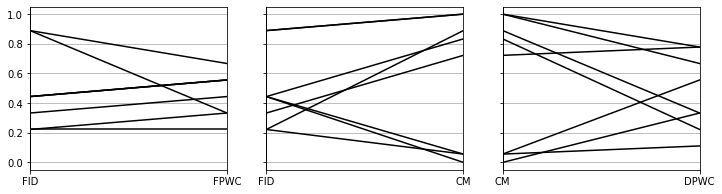

In [56]:
tempvis = visualization.Visualizer()
try:
    dfm["index"]
except:
    dfm["index"] = [i for i in range(len(dfm["condition"].values))]
tempvis.parallelCoordinateVariablePairs(varPairList=[
                                            ['FID','FPWC'],
                                            ['FID','CM'],
                                            ['CM','DPWC'],
                                        ],
                                        colors=["black"]*3,
                                        grid=True,
                                        groupBy="index",
                                        dataFrame=dfm,
                                        removeLegend=True,
                                        nrows=1, ncols=3, sharey=True, figsize=(12,3))


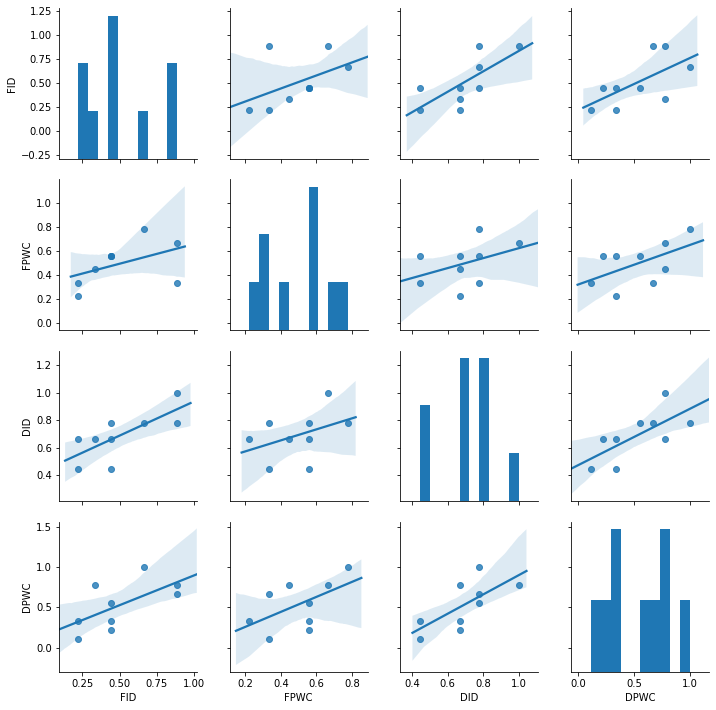

In [97]:
g = sns.pairplot(df[['FID','FPWC','DID','DPWC']], kind="reg")

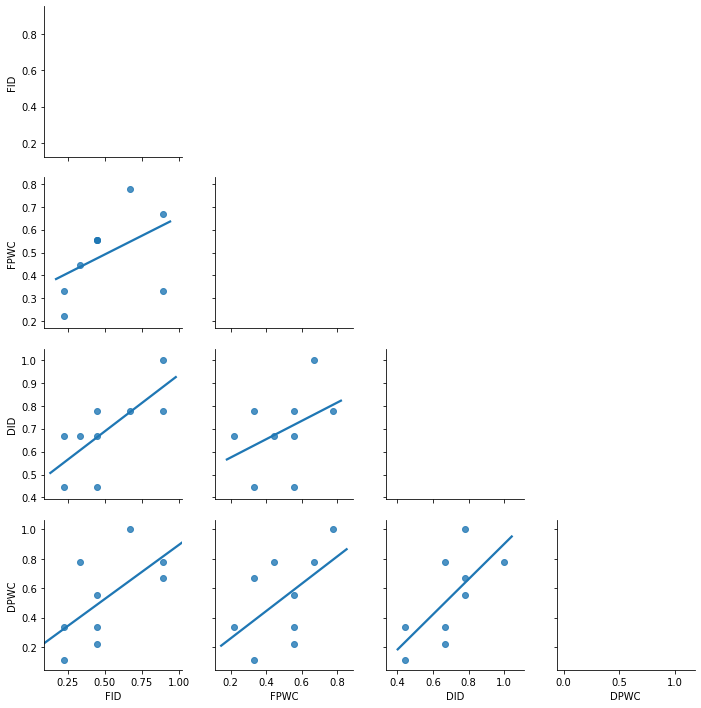

In [98]:
g = sns.pairplot(df[['FID','FPWC','DID','DPWC']], kind="reg", palette="BuGn_r", plot_kws={"ci":None})

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

for ax in g.diag_axes: 
    ax.set_visible(False)
    


In [ ]:
dfconf["meanConfidence"] = (dfconf["confFID"] + dfconf["confFPWC"] + dfconf["confDID"]+ dfconf["confDPWC"])/4

In [ ]:
t1,p1 = stats.ttest_ind(dfconf["confFPWC"].values, dfconf["confFID"].values)
t2,p2 = stats.ttest_ind(dfconf["confFPWC"].values, dfconf["confDID"].values)
t3,p3 = stats.ttest_ind(dfconf["confFPWC"].values, dfconf["confDPWC"].values)

print(p1/2)
print(p2/2)
print(p3/2)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(8,3))

visualizer.barPlotSingle(dataFrame=dfconf,
                   columns=["FID","FPWC","DID","DPWC"], 
                   title="Scores",
                   axis=ax[0],
                   showError=True,
                   displayPoints=False,
                   returnAxis=True,
                   figsize=(4,6))

visualizer.barPlotSingle(dataFrame=dfconf,
                   columns=['confFID','confFPWC','confDID','confDPWC'], 
                   title="Level of Confidence in Answers",
                   axis=ax[1],
                   showError=True,
                   displayPoints=False,
                   figsize=(4,6),
                   returnAxis=False,
                   columnAlias=["FID","FPWC","DID","DPWC"])

In [ ]:
dfconftemp = df[['condition','confFID','confFPWC','confDID','confDPWC','SA']].copy()
rPearson, pPearson, ciLoPearson, ciHiPearson = utils.calculate_pearsonr(dfconftemp, decimal=3)
rPearson

In [ ]:
pPearson

In [ ]:
sns.pairplot(df[['FID','FPWC','FSYN']], kind="reg")

In [ ]:
sns.pairplot(df[['DID','DPWC','DSYN']], kind="reg")

In [ ]:
df.shape

# Cronbach's alpha

### measures

In [99]:
for i in range(df.shape[0]):
    fid = dfm["FID"].values[i]
    fpwc = dfm["FPWC"].values[i]
    did = dfm["DID"].values[i]
    dpwc = dfm["DPWC"].values[i]
    fsyn = dfm["FSYN"].values[i]
    dsyn = dfm["DSYN"].values[i]
    cm = dfm["CM"].values[i]
    sa = dfm["SA"].values[i]
    
#     out = [fsyn, dsyn, cm, sa]
    out = [fid, fpwc, did, dpwc]
    out = [str(x) for x in out]
    print(" ".join(out))


0.889 0.333 0.778 0.667
0.222 0.222 0.667 0.333
0.444 0.556 0.444 0.333
0.333 0.444 0.667 0.778
0.444 0.556 0.667 0.222
0.222 0.333 0.444 0.111
0.889 0.667 1.0 0.778
0.444 0.556 0.778 0.556
0.667 0.778 0.778 1.0


### self-assessment

In [ ]:
for s in resultAnalyzer.subjects:
    out = [str(n) for n in s.learning_self_assessment_data]
    print(" ".join(out))
    

# PCA

In [100]:
# transpose data in order to standardize data by each feature [nFeatures, nSamples]
dat = np.transpose(np.array(df[["FID","FPWC","DID","DPWC"]]))
# dat = np.transpose(np.array(df[["FID","FPWC","FSYN","DID","DPWC","DSYN","CM","SA"]]))
tmp = []
for f in dat:
    mean = np.mean(f)
    stdev = np.std(f)
    tmp.append([(x - mean) / stdev for x in f])
dat = tmp
# transpose back to original structure [nSamples, nFeatures]
dat = np.transpose(dat)

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(dat)  
print([round(x,2) for x in pca.explained_variance_ratio_])  
print([round(x,2) for x in pca.singular_values_])  

pcaComponents = pca.components_
temp = []
for row in pcaComponents:
    temp.append([round(col,2) for col in row])
pcaComponents = np.array(temp)

[0.69, 0.16, 0.09, 0.06]
[4.98, 2.41, 1.79, 1.46]


In [101]:
pcaComponents

array([[ 0.52,  0.43,  0.52,  0.53],
       [ 0.28, -0.86,  0.43, -0.01],
       [-0.66, -0.19,  0.08,  0.72],
       [ 0.46, -0.22, -0.73,  0.45]])

In [102]:
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.9137183 ,  0.24138697, -0.41773685,  0.2394726 ],
       [ 0.74927375, -0.73279886, -0.11816703, -0.11238872],
       [ 0.91965892,  0.36528784,  0.04902372, -0.37866732],
       [ 0.92866948, -0.00800388,  0.45780352,  0.23005408]])

# Factor analysis

In [103]:
dfm

,condition,FID,FPWC,FSYN,DID,DPWC,DSYN,CM,SA,index
0,IKE,0.889,0.333,0.175,0.778,0.667,0.706,1.000,0.4,0
1,AKE,0.222,0.222,1.000,0.667,0.333,0.297,0.889,0.2,1
2,MKE,0.444,0.556,0.213,0.444,0.333,0.511,0.000,0.6,2
3,IKE,0.333,0.444,0.610,0.667,0.778,1.000,0.722,0.4,3
4,AKE,0.444,0.556,0.846,0.667,0.222,0.000,0.833,0.8,4
5,MKE,0.222,0.333,0.000,0.444,0.111,0.213,0.056,0.0,5
6,IKE,0.889,0.667,0.503,1.000,0.778,0.328,1.000,1.0,6
7,AKE,0.444,0.556,0.225,0.778,0.556,0.507,0.056,0.6,7
8,IKE,0.667,0.778,0.720,0.778,1.000,0.574,0.667,0.8,8


In [104]:
# transpose data in order to standardize data by each feature [nFeatures, nSamples]
dat = np.transpose(np.array(dfm[["FID","FPWC","DID","DPWC"]]))
# dat = np.transpose(np.array(df[["FID","FPWC","DID","DPWC","DSYN","SA"]]))
# dat = np.transpose(np.array(df[["FID","FPWC","DID","DPWC","CM","SA"]]))
# dat = np.transpose(np.array(df[["FID","FPWC","DID","DPWC","DSYN","CM","SA"]]))
# dat = np.transpose(np.array(dfm[["FID","FPWC","FSYN","DID","DPWC","CM"]]))
# dat = np.transpose(np.array(dfm[["FID","FPWC","FSYN","DID","DPWC","DSYN","CM","SA"]]))

tmp = []
for f in dat:
    mean = np.mean(f)
    stdev = np.std(f)
    tmp.append([(x - mean) / stdev for x in f])
dat = tmp

# transpose back to original structure [nSamples, nFeatures]
dat = np.transpose(dat)

# from sklearn.datasets import load_digits
# from sklearn.decomposition import FactorAnalysis
# fa = FactorAnalysis(n_components=None, random_state=0).fit(dat)

# https://stackoverflow.com/questions/41388997/factor-analysis-in-sklearn-explained-variance

# m = fa.components_
# n = fa.noise_variance_

# faComponents = []
# for row in m:
#     faComponents.append([round(col,2) for col in row])
# faComponents = np.array(faComponents)
    
# m1 = m**2
# m2 = np.sum(m1,axis=1)
# print()

# pvar1 = (100*m2[0])/np.sum(m2)
# pvar2 = (100*m2[1])/np.sum(m2)
# out = [(100*m2[i])/np.sum(m2) for i in range(np.shape(m)[0])]
# pvar1_with_noise = (100*m2[0])/(np.sum(m2)+np.sum(n))
# pvar2_with_noise = (100*m2[1])/(np.sum(m2)+np.sum(n))
# out = [(100*m2[i])/(np.sum(m2)+np.sum(n)) for i in range(np.shape(m)[0])]
# out

In [105]:
from factor_analyzer import calculate_kmo,calculate_bartlett_sphericity

kmo_var, kmo_total = calculate_kmo(dat)
print("kmo: {0}".format(str(round(kmo_total,4))))
print([round(x, 3) for x in kmo_var])
print()
bs_stat, bs_p = calculate_bartlett_sphericity(dat)
print("bartlett stat:{0}, p-value: {1}".format(round(bs_stat, 4),round(bs_p, 8)))
print()

kmo: 0.759
[0.776, 0.795, 0.715, 0.77]

bartlett stat:11.0425, p-value: 0.03049025



In [106]:
import pandas as pd
from factor_analyzer import FactorAnalyzer, Rotator
fa2 = FactorAnalyzer(n_factors=8, rotation="varimax")
fa2.fit(dat)
original_eigen_values, common_factor_eigen_values = fa2.get_eigenvalues()
print([round(x,2) for x in original_eigen_values])
print([round(abs(x),2) for x in common_factor_eigen_values])

[2.76, 0.65, 0.36, 0.24]
[2.5, 0.25, 0.11, 0.0]


In [107]:
out = []
colnames = ["FID","FPWC","DID","DPWC","CM","SA"]
for i, rowdata in enumerate(fa2.loadings_):
    row = [round(col,3) for col in rowdata]
    out.append(row)

#     rowstring = [str(x) for x in row]
#     rowstring = [colnames[i]] + rowstring
#     print(" & ".join(rowstring) + " \\\\")
    
out = np.array(out)
# print(out)

# "FID","FPWC","FSYN","DID","DPWC","DSYN","CM","SA"
scree(common_factor_eigen_values)

NameError: name 'scree' is not defined

In [108]:
common_factor_eigen_values_abs = [round(abs(x),2) for x in common_factor_eigen_values]
sum(common_factor_eigen_values_abs[0:1])/sum(common_factor_eigen_values_abs)

0.8741258741258742

### Rotation

In [ ]:
rotator = Rotator(method="varimax")
rotated = rotator.fit_transform(fa2.loadings_)
out = []
for row in rotated:
    out.append([round(col,2) for col in row])
out = np.array(out)
out
# "FID","FPWC","FSYN","DID","DPWC","DSYN","CM","SA"

In [ ]:
sum(common_factor_eigen_values_abs[0:4])/sum(common_factor_eigen_values_abs)

### Confirmatory

In [ ]:
# import pandas as pd
# from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)


In [ ]:
# model_array = np.array([[1, 1, 1, 1, 0, 0, 0, 0],
#                         [0, 0, 0, 0, 1, 1, 0, 0],
#                         [0, 0, 0, 0, 0, 0, 1, 0],
#                         [0, 0, 0, 0, 0, 0, 0, 1],
#                         [0, 0, 0, 0, 0, 0, 0, 0],
#                         [0, 0, 0, 0, 0, 0, 0, 0],
#                         [0, 0, 0, 0, 0, 0, 0, 0],
#                         [0, 0, 0, 0, 0, 0, 0, 0],
#                        ])
# model_spec = ModelSpecificationParser.parse_model_specification_from_array(dat,model_array)  
# cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
# cfa.fit(dat)

### Scree plot

In [50]:
def scree(eigvals, figsize=(8,5)):
    fig, ax = plt.subplots(figsize=figsize)
    
    eigvals = [abs(x) for x in eigvals]
    eigsum = sum(eigvals)
#     eigvals_adjusted = [x / eigsum for x in eigvals]
    numFactors = [i+1 for i in range(len(eigvals))]

    plt.plot(numFactors, eigvals, 'ko-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Number of Factors')
    plt.ylabel('Eigenvalue')
    ax.set_xticks(numFactors)
    plt.axhline(y=1.0, color='r', linestyle='--')
    #I don't like the default legend so I typically make mine like below, e.g.
    #with smaller fonts and a bit transparent so I do not cover up data, and make
    #it moveable by the viewer in case upper-right is a bad place for it 
    plt.show()


In [51]:
def efa(df, varNames):
    dat = np.transpose(np.array(df[varNames]))
    tmp = []
    for f in dat:
        mean = np.mean(f)
        stdev = np.std(f)
        tmp.append([(x - mean) / stdev for x in f])
    dat = tmp
    dat = np.transpose(dat)
    fa = FactorAnalyzer(n_factors=8, rotation=None)
    fa.fit(dat)
    original_eigen_values, common_factor_eigen_values = fa.get_eigenvalues()
    scree(common_factor_eigen_values)

In [ ]:
efa(df, ["FID","FPWC","DID","DPWC","FSYN","DSYN","CM","SA"])

In [ ]:
efa(df, ["FID","DID","DPWC"])

In [ ]:
efa(df, ["FSYN","DSYN","CM","SA"])

In [ ]:
efa(df, ["FSYN","CM","SA"])

In [ ]:
efa(df, ["FSYN","DSYN","CM"])

In [ ]:
efa(df, ["FSYN","DSYN","SA"])

In [ ]:
efa(df, ["DSYN","CM","SA"])